# scatter plot and correlation coefficient 

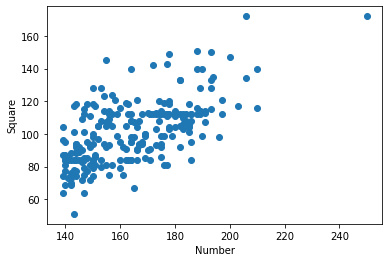

correlation coefficient = 0.9953243433267447


In [42]:
import numpy as np
import matplotlib.pyplot as plt
import csv
def find_corr_x_y(x,y):
    n = len(x)
    # product sum
    prod = []
    for xi,yi in zip(x,y):
        prod.append(xi*yi)
    
    sum_prod_x_y = sum(prod)
    sum_x = sum(x)
    sum_y = sum(y)
    squared_sum_x = sum_x**2
    squared_sum_y = sum_y**2
    x_square = []
    
    for xi in x:
        x_square.append(xi**2)
    # Find the sum
    x_square_sum = sum(x_square)
    y_square=[]
    
    for yi in y:
        y_square.append(yi**2)
   
    # sum
    y_square_sum = sum(y_square)
    
    # calculating correlation
    numerator = n*sum_prod_x_y - sum_x*sum_y
    denominator_term1 = n*x_square_sum - squared_sum_x
    denominator_term2 = n*y_square_sum - squared_sum_y
    denominator = (denominator_term1*denominator_term2)**0.5
    correlation = numerator/denominator

    return correlation
######################################scatter plot
def scatter_plot(x, y):
    plt.scatter(x, y)
    plt.xlabel('Number')
    plt.ylabel('Square')
    plt.show()
    ############################3reading file
def read_csv(filename):
    numbers = []
    squared = []
    with open(filename) as f:
        reader = csv.reader(f)
        next(reader)
        for row in reader:
            numbers.append(int(row[0]))
            squared.append(int(row[1]))
        return numbers, squared
if __name__ == '__main__':
    numbers, squared = read_csv(r"C:\Users\ddel\dataset.csv")
    scatter_plot(numbers, squared)
    print("correlation coefficient =",find_corr_x_y(x,y))

# β1 & β2 calculation

In [47]:
num = 0
den = 0
m_x = np.mean(x)
m_y = np.mean(y)
for i in range(len(x)):
    num = num + (x[i] - m_x )*(y[i] - m_y)
    den = den + (x[i] - m_x)**2
beta_1 = num/den
beta_0 = m_y - beta_1*m_x
print("\u03B21 =",beta_1)
print("\u03B22 =",beta_0)

β1 = 1.0384413539753345
β2 = 1.6849908160587752


# y_pridection

In [50]:
beta_1 = 0.995570356119447
beta_0 = -0.03728651428244234
Y_pred = []
for i in range(len(x)):
    Y_pred.append(beta_1 * x[i] + beta_0)
print("y_predicted are may be =",Y_pred)

y_predicted are may be = [0.9582838418370047, 2.9494245540758985, 3.9449949101953456, 5.936135622434239, 78.61277161915388]


# fitting the model

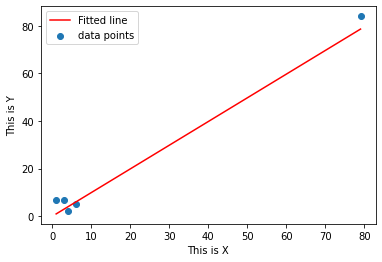

In [52]:
plt.scatter(x , y  , label = "data points")
plt.plot([min(x) , max(x)] , [min(Y_pred) , max(Y_pred)] , color = "red" , label = "Fitted line")
plt.xlabel("This is X")
plt.ylabel("This is Y")
plt.legend()
plt.show()

# residual calculation

In [71]:
def r_square(x,y):
    m_y = np.mean(y)
    n = len(y)
    Y = np.array(y)
    error = Y - Y_pred
    SS_res = np.sum(error**2)
    SS_total = np.sum((Y - m_y)**2)
    R_square = 1-(SS_res/SS_total)
    return print("SS residual is = {0} \nR_square is = {1}".format(SS_res,R_square))
r_square(x,y)

SS residual is = 86.59108031060116 
R_square is = 0.9826052470247888


# anova table for observation

In [79]:
DF_REG = 1
DF_RES = len(x) - 2 
DF_TOT = len(x) - 1
############################################Sum of square
m_y = np.mean(y)
n = len(y)
Y = np.array(y)
error = Y - Y_pred
################################################## SS Residual 
SS_res = np.sum(error**2)
################################################### SS Regression
SS_Reg = np.sum((Y_pred - m_y)**2)
# ####################################################SS Total
SS_total = np.sum((Y - m_y)**2)
############################################### MS Residual
MS_Res = SS_res/DF_RES
############################################## S Regression
MS_Reg = SS_Reg/DF_REG
############################################ F Statistics
F = MS_Reg/MS_Res

In [77]:
def anova_table():
    print('{0}\t\t{1}\t\t{2}\t\t\t{3}\t\t\t{4}'.format( "Sources","DF  " , "SS" , "MS" , "F statistics"))
    print('{0}\t{1}\t{2}\t{3}\t\t{4}'.format( "Regression" ,DF_REG , SS_Reg , MS_Reg , F))
    print('{0}\t{1}\t{2}\t{3}'.format("Residual",DF_RES , SS_res , MS_Res))
    print('{0}\t\t{1}\t{2}'.format("Total",  DF_TOT , SS_total ))

In [78]:
anova_table()

Sources		DF  		SS			MS			F statistics
Regression	1	4564.518322733109	4564.518322733109		158.14047958612724
Residual	3	86.59108031060116	28.863693436867052
Total		4	4978.0
